In [21]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots


#plt.style.use(['science','nature'])
plt.style.use('sci.mplstyle')

folder = "Results"

### Bernardi and 1-RDM simulation

In [22]:
exact_sqp_mean = np.load(f"{folder}/exact_sqp_mean.npy")

bernardi_sqp_mean = np.load(f"{folder}/bernardi_sqp_mean.npy")
bernardi_sqp_error = np.load(f"{folder}/bernardi_sqp_error.npy")
bernardi_fidelity_mean = np.load(f"{folder}/bernardi_fidelity_mean.npy")

onerdm_sqp_mean = np.load(f"{folder}/onerdm_sqp_mean.npy")
onerdm_sqp_error = np.load(f"{folder}/onerdm_sqp_error.npy")
onerdm_fidelity_mean = np.load(f"{folder}/onerdm_fidelity_mean.npy")

### MPS simulation

In [23]:
def load_mps(contraction, bond_dimension):

    suffix = "_" + contraction + "_" + str(bond_dimension)
    mps_sqp_mean = np.load(f"{folder}/mps_sqp_mean{suffix}.npy")
    mps_sqp_error = np.load(f"{folder}/mps_sqp_error{suffix}.npy")
    mps_fidelity_mean = np.load(f"{folder}/mps_fidelity_mean{suffix}.npy")

    return mps_sqp_mean, mps_sqp_error, mps_fidelity_mean

### Plotting

In [ ]:
def plotting(method, contraction, bond_dimension):
    fig = plt.figure(figsize=(5, 8))

    ax1a = fig.add_axes([0.00, 0.70, 1.00, 0.30])
    ax1b = fig.add_axes([0.00, 0.35, 1.00, 0.30])
    ax1c = fig.add_axes([0.00, 0.00, 1.00, 0.30])

    # Add the x and y-axis labels
    ax1a.set_ylabel(r'$\mathcal{E}_{\mathrm{SQP}}$'    , labelpad=1.0)
    ax1b.set_ylabel(r'$\bar{F}$'                       , labelpad=1.0)
    ax1c.set_ylabel(r'Mean SQP'                        , labelpad=1.0)
    ax1c.set_xlabel(r'Step'                            , labelpad=1.5)

    # Set the axis limits
    ax1a.set_ylim(-0.1, 1)
    ax1b.set_ylim(-0.1, 1.75)
    ax1c.set_ylim(-0.1, 1)

    if (method == "1-RDM"):
        proposed_sqp_mean = onerdm_sqp_mean
        proposed_sqp_error = onerdm_sqp_error
        proposed_fidelity_mean = onerdm_fidelity_mean
        label1 = "1-RDM"
        label2 = "|1-RDM - Bernardi|"
        suffix = "_1-RDM"
    elif (method == "MPS"):
        proposed_sqp_mean, proposed_sqp_error, proposed_fidelity_mean = load_mps(contraction, bond_dimension)
        label1 = "MPS d = " + str(bond_dimension)
        label2 = "|MPS - Bernardi|" 
        suffix = "_mps_" + contraction + "_" + str(bond_dimension)
    
    # Plot Figure a
    ax1a.text(-30.0, 1, '(a)')
    ax1a.axhline(0, 0, bernardi_sqp_error.shape[0], color='gray', linewidth=1)
    ax1a.plot(np.arange(bernardi_sqp_error.shape[0]), bernardi_sqp_error, color="r", label="Bernardi", linestyle="dashed")
    ax1a.plot(np.arange(proposed_sqp_error.shape[0]), proposed_sqp_error, color="g", label=label1, linestyle="solid")
    ax1a.plot(np.arange(proposed_sqp_error.shape[0]), np.abs(bernardi_sqp_error - proposed_sqp_error), color="b", label=label2, linestyle="dashdot")

    # Plot Figure b
    ax1b.text(-30.0, 1.0, '(b)')
    ax1b.axhline(0, 0, bernardi_sqp_error.shape[0], color='gray', linewidth=1)
    ax1b.plot(np.arange(bernardi_sqp_error.shape[0]), bernardi_fidelity_mean, color="r", label="Bernardi", linestyle="dashed")
    ax1b.plot(np.arange(proposed_sqp_error.shape[0]), proposed_fidelity_mean, color="g", label=label1, linestyle="solid")
    ax1b.plot(np.arange(proposed_sqp_error.shape[0]), np.abs(proposed_fidelity_mean - bernardi_fidelity_mean), color="b", label=label2, linestyle="dashdot")

    # Plot Figure c
    ax1c.text(-30.0, 1, '(c)')
    ax1c.axhline(0.5, 0, bernardi_sqp_error.shape[0])
    ax1c.plot(np.arange(bernardi_sqp_error.shape[0]), bernardi_sqp_mean, color="r", label="Bernardi", linestyle="dashed")
    ax1c.plot(np.arange(proposed_sqp_error.shape[0]), proposed_sqp_mean, color="g", label=label1, linestyle="solid")

    leg = ax1a.legend( fontsize=12, fancybox=True, handlelength=1.5)
    for line, text in zip(leg.get_lines(), leg.get_texts()):
        text.set_color(line.get_color())

    leg = ax1b.legend(fontsize=12, fancybox=True, handlelength=1.5)
    for line, text in zip(leg.get_lines(), leg.get_texts()):
        text.set_color(line.get_color())

    leg = ax1c.legend(fontsize=12, fancybox=True, handlelength=1.5)
    for line, text in zip(leg.get_lines(), leg.get_texts()):
        text.set_color(line.get_color())
        
    fig.savefig(f"{folder}/Figure1{suffix}.pdf", bbox_inches="tight")

/tmp/ipykernel_1632584/518125333.py:64: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_1632584/518125333.py:64: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_1632584/518125333.py:64: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_1632584/518125333.py:64: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_1632584/518125333.py:64: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


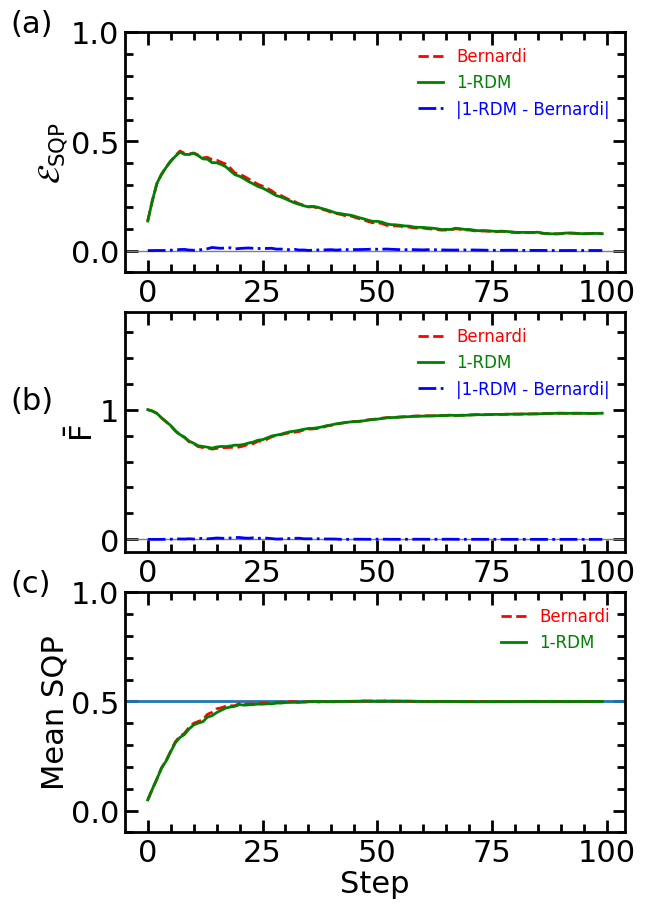

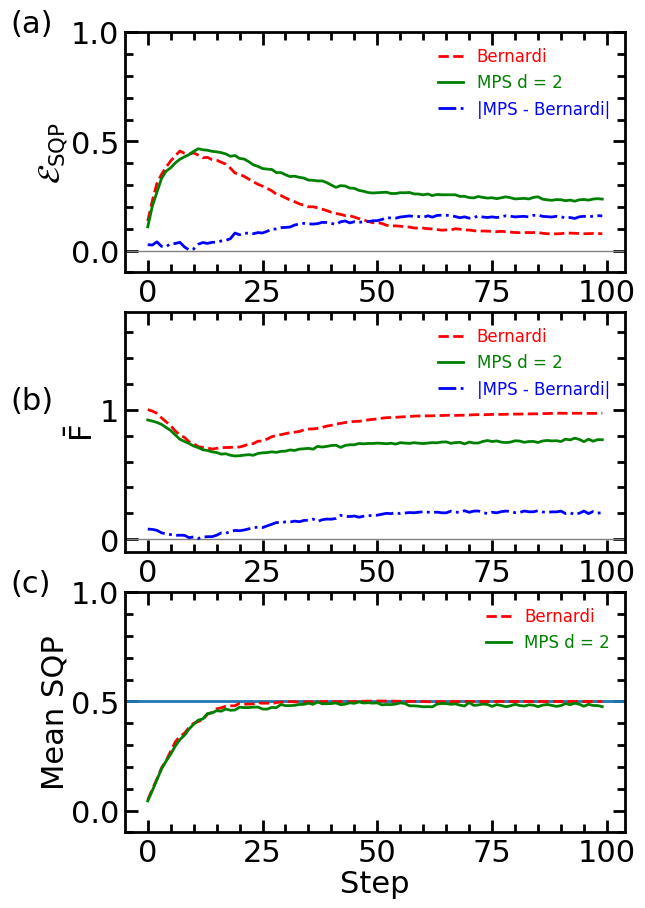

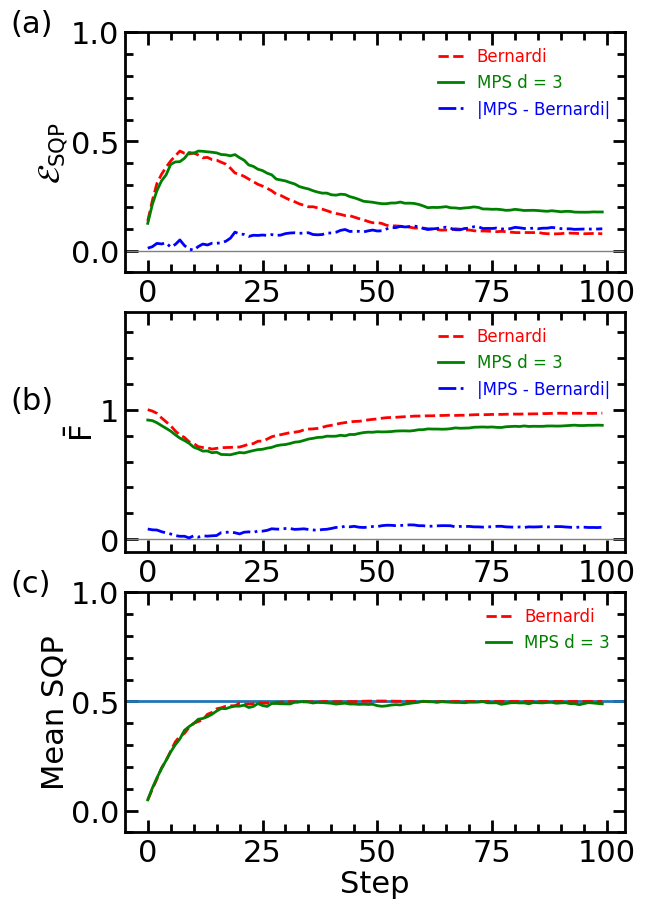

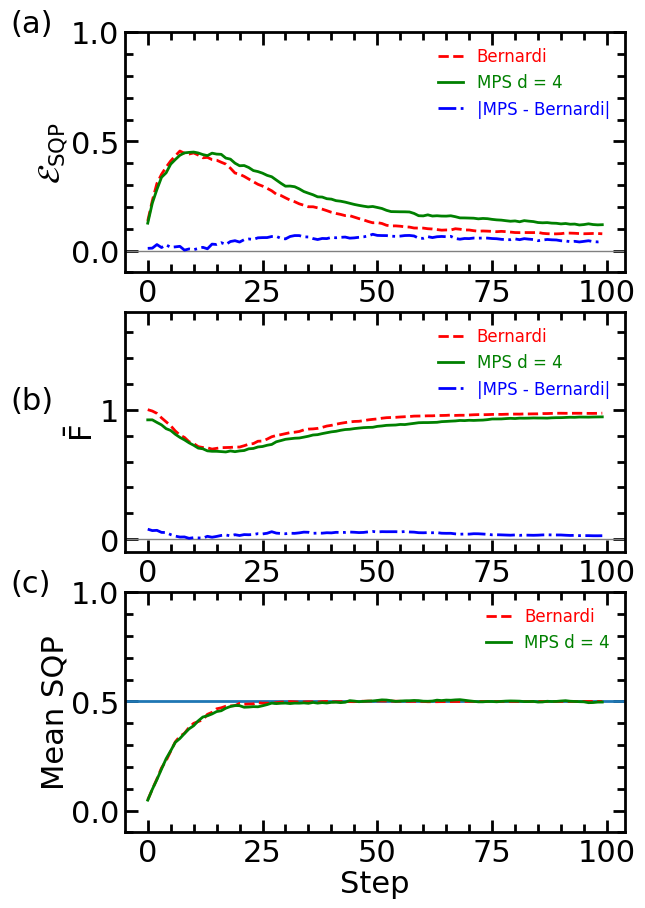

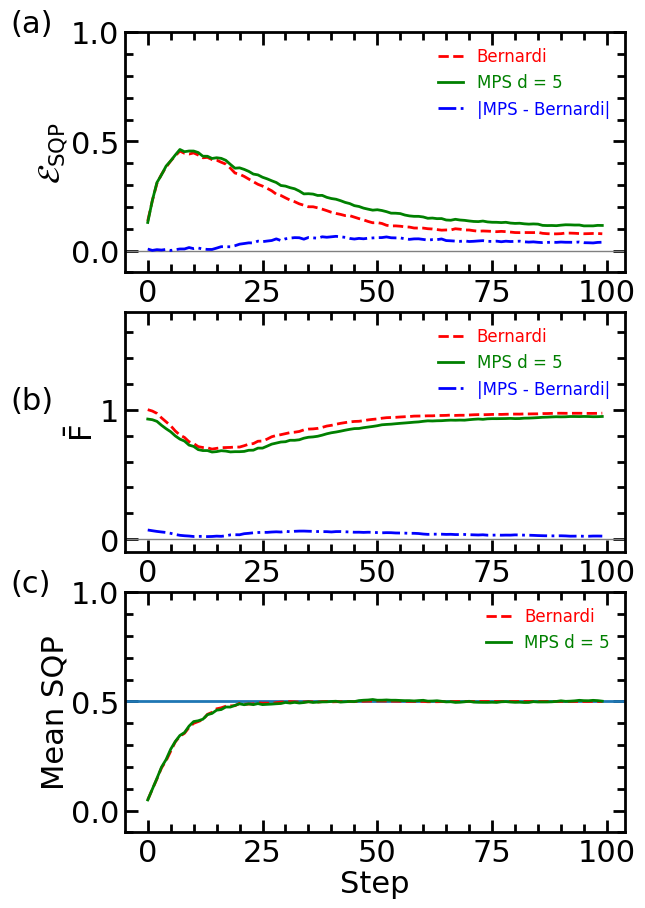

In [ ]:
plotting("1-RDM", _, _)
plotting("MPS", "auto-mps", 2)
plotting("MPS", "auto-mps", 3)
plotting("MPS", "auto-mps", 4)
plotting("MPS", "auto-mps", 5)